## 遺伝的アルゴリズム
### この関数作って
#### 初期値生成
#### 評価
#### 選択
#### 突然変異

とその前に。。。。
## リアルタイム可視化の方法

[このサイトのコードを引用](https://www.sejuku.net/blog/61007)

どうやら %matplotlib notebook と　%matplotlib inline  この二つは実行環境によって動作が異なるらしい。<br>

## %matplotlib inlineの場合
○：JupyterLab<br>
○：Jupyter Notebook

## %matplotlib notebookの場合
×：JupyterLab（→「Javascript Error: IPython is not defined」と表示される。）<br>
○：Jupyter Notebook

引用
[【備忘録】JupyterLabとJupyter Notebookにおける%matplotlib inlineと%matplotlib notebookの挙動の違い（Javascript Error: IPython is not defined）](https://tropicbird.hatenablog.com/entry/2019/08/28/110119)

そういえばjupyterlabとjupyter notebookについてあんま調べなかったからついでに
jupyterlabはjupyter notebookの進化系みたいなやつで、notebookの方は一画面表示しかできなかったのに対し、複数の画面を表示できるようにしたのがlabっていう感じかな？<br>
調べている途中に面白そうなツールなどを発見したのでインストール<br>
Node.jsのインストールが必要だったのでついでにインストール<br>
[参考資料](https://qiita.com/kyosuke5_20/items/c5f68fc9d89b84c0df09)<br>
[役立つやつ](https://qiita.com/kirikei/items/a1639954ce5ccaf7ac3c)<br>

ということで本題に...
ちなみに、サイトのやつそのままだとどうやらうまくいかないようで、調べたらそのままコピペした人のteratailの質問があったので、その回答のコードを参考（丸写し）しました。<br>
[python におけるアニメーション](https://teratail.com/questions/223929)

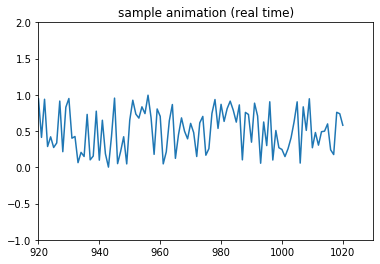

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation
import random
from IPython.display import HTML
fig = plt.figure()
xlim = [0, 110]
X, Y = [], []
def plot(data):
    plt.cla()  # 前のグラフを削除
    for i in range(10):
        Y.append(random.random())  # データを作成
        X.append(len(Y))
        # # 描画範囲を更新
        if len(X) > 100: 
            xlim[0] += 1
            xlim[1] += 1
    plt.plot(X, Y)  # 次のグラフを作成
    plt.title("sample animation (real time)")
    plt.ylim(-1, 2)
    plt.xlim(xlim[0], xlim[1])
# 10msごとにplot関数を呼び出してアニメーションを作成
ani = animation.FuncAnimation(fig, plot, interval=100,)
HTML(ani.to_jshtml())

完了。ということで早速関数作り

# 初期値生成

In [31]:
import numpy as np

def create_citys(num_of_citys):
    citys = np.zeros((num_of_citys, 2))
    for x in range(num_of_citys):
        citys[x,0] = random.random()
        citys[x,1] = random.random()
    return citys



In [32]:
citys_info=create_citys(10)

In [33]:
citys_info.shape

(10, 2)

# 初期遺伝子情報作成

In [34]:

def create_gene(data, num_of_gene):
    gene = np.zeros((num_of_gene,data.shape[0]))
    gene_sample = np.array(list(range(10)))
    for y in range(gene.shape[0]):
        random.seed(y)
        gene[y] = np.random.permutation(gene_sample)
    return gene

In [35]:
gene = create_gene(citys_info, 50)

# 評価

In [36]:

def culc_dist(city_info, gene):
    dist = np.zeros(gene.shape[0])
    for x in range(gene.shape[0]):
        dist_contain = 0
        for y in range(gene.shape[1]-1):
            dist_contain += np.linalg.norm(city_info[int(gene[x, y])] - city_info[int(gene[x, y+1])])
        dist[x] = dist_contain
    return dist

In [37]:
dist_list = culc_dist(citys_info,gene)

# 選択　エリート、ルーレット

In [38]:

def choice(dist_list):

    def create_plob(dist_list):
        re_dist_list = 1/dist_list
        sum = np.sum(re_dist_list)
        plob = np.zeros(len(dist_list.shape))
        plob = re_dist_list/sum
        return plob



    roulette = create_plob(dist_list)
    choiced = np.random.choice(len(roulette), 2,replace = False, p = roulette)
    return choiced



In [39]:
choice(dist_list)

array([ 7, 34])

In [40]:

def cross_over(gene,crosslist):
    parent1 = gene[crosslist[0]]
    parent2 = gene[crosslist[1]]
    
    slit = random.randint(0,parent1.shape[0]-1)
    #for x in range(slit,parent1.shape[0]):
    for x in range(1):
        print(x)
        find_data2 = parent1[x]
        find_data1 = parent2[x]
        index_palet=np.array(range(10))
        index2 = index_palet[np.where(parent2 == find_data2,True,False)]
        index1 = index_palet[np.where(parent1 == find_data1,True,False)]
        print(parent1,parent2)
        parent1[9] = 0
        print(parent1)
        #parent1[[x,index1[0]] = parent1[[index1[0],x]]
        #parent2[[x,index2[0]]] = parent2[[index2[0],x]]
        print(parent1,parent2)
        print(gene)
    #return parent1,parent2

In [41]:
gene_sample = create_gene(citys_info, 2)

In [42]:
gene_sample

array([[0., 9., 2., 7., 5., 1., 4., 6., 3., 8.],
       [1., 9., 0., 3., 4., 6., 7., 8., 5., 2.]])

In [43]:
cross_over(gene_sample,[0,1])

0
[0. 9. 2. 7. 5. 1. 4. 6. 3. 8.] [1. 9. 0. 3. 4. 6. 7. 8. 5. 2.]
[0. 9. 2. 7. 5. 1. 4. 6. 3. 0.]
[0. 9. 2. 7. 5. 1. 4. 6. 3. 0.] [1. 9. 0. 3. 4. 6. 7. 8. 5. 2.]
[[0. 9. 2. 7. 5. 1. 4. 6. 3. 0.]
 [1. 9. 0. 3. 4. 6. 7. 8. 5. 2.]]


In [44]:
gene_sample

array([[0., 9., 2., 7., 5., 1., 4., 6., 3., 0.],
       [1., 9., 0., 3., 4., 6., 7., 8., 5., 2.]])